## Adult income Dataset


### Abstract

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

link: https://www.kaggle.com/wenruliu/adult-income-dataset

In [1]:
import math

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./data/adult.csv')
na_idx = np.array([ any(i=='?') for i in df.values])
df = df.loc[~na_idx, :]
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


추출은 1994년 인구 조사 데이터베이스에서 Barry Becker가 수행했습니다. 다음 조건을 사용하여 합리적으로 깨끗한 레코드 세트를 추출했습니다. ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))


- `age`: 나이
- `workclass`: 직업. 사립, 자영업, 정부, 무급 등..
- `fnlwgt`: 가중치(모름)
- `education`: 학력
- `education.num`: 교육 번호
- `marital.status`: 결혼 여부
- `occupation`: 직업 종류 공예, 수리, 기타 서비스 등등
- `relationship`: 관계 아내, 자녀, 남편 등
- `race`: 인종
- `sex`: 성별
- `capital.gain`: 자본 이득
- `capital.loss`: 자본 손실
- `hours.per.week`: 주당 근무 시간
- `native.country`: 출신 국가
- `income`: 소득

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [4]:
num_idx = df.dtypes[df.dtypes != 'object'].index
num_idx = [df.columns.get_loc(idx) for idx in num_idx]
df.iloc[:, num_idx].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


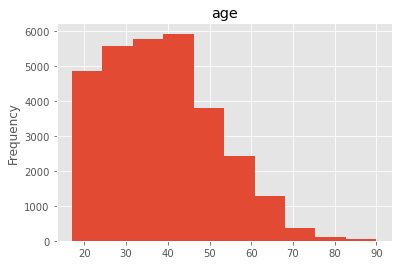

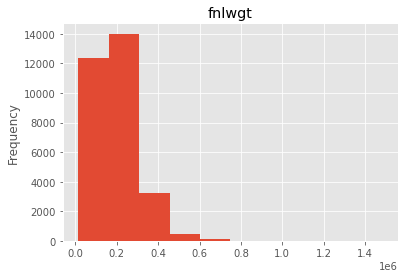

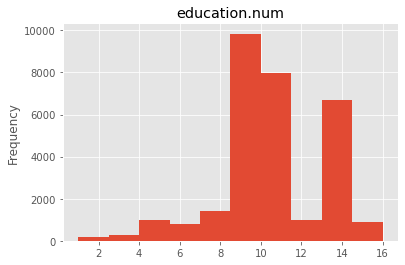

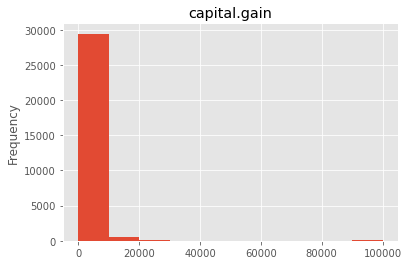

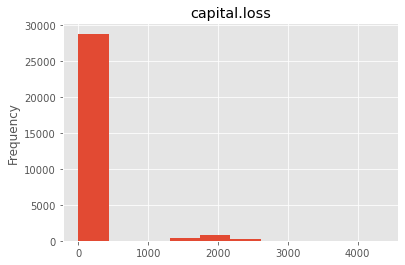

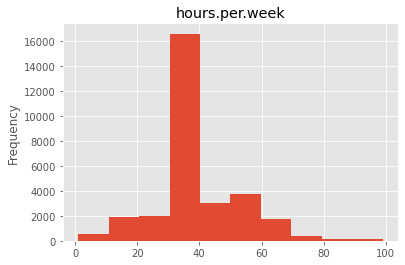

In [5]:
for col in num_idx:
    df.iloc[:, col].plot.hist(title=df.iloc[:, col].name);
    plt.show()

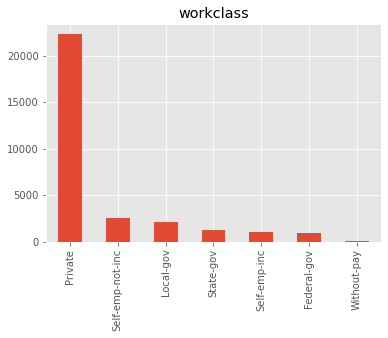

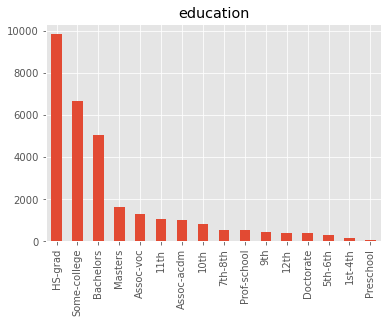

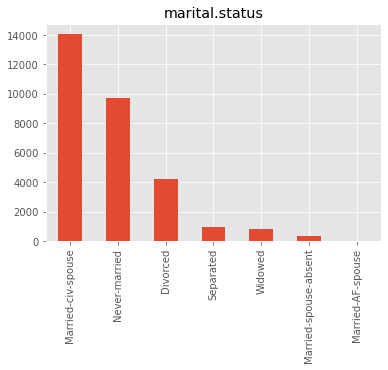

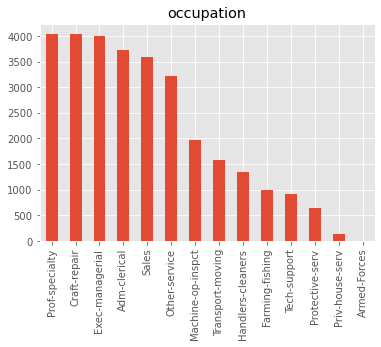

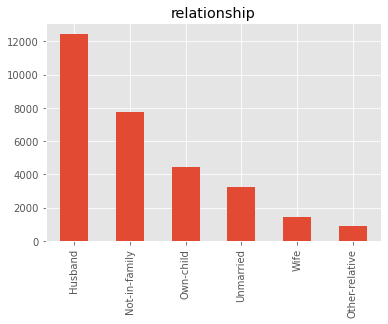

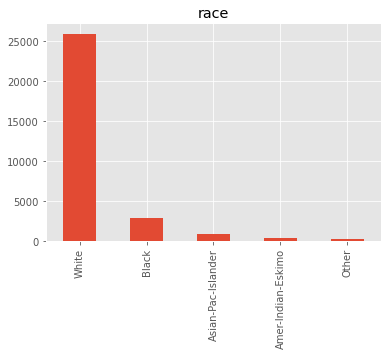

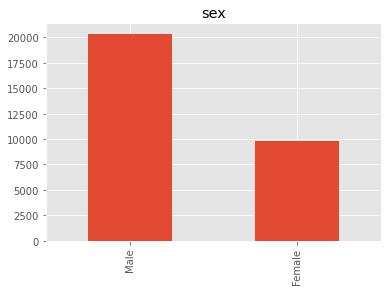

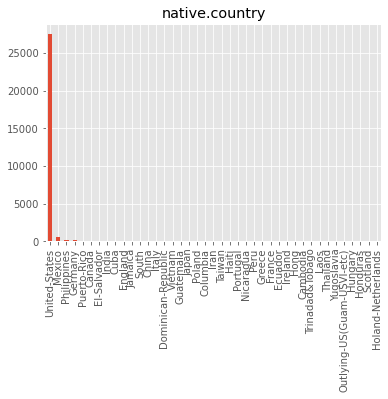

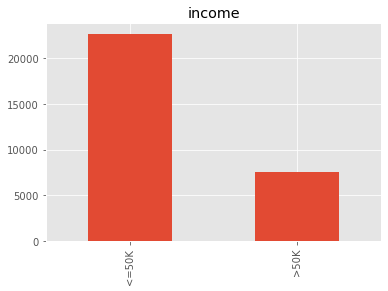

In [6]:
cat_idx = list(set(range(df.shape[1])) - set(num_idx))
for col in cat_idx:
    df.iloc[:, col].value_counts().plot.bar(title=df.iloc[:, col].name)
    plt.show()

### Analysis

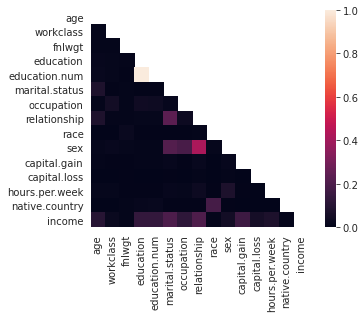

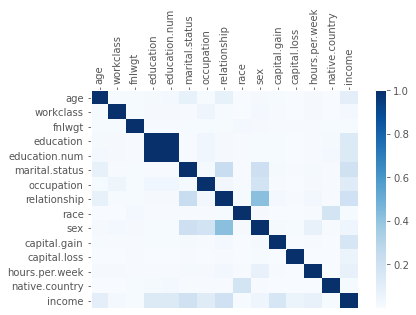

In [7]:
def discretize(x):
    if x < 2:
        return str(1)
    return str(int(math.log(x, 2) ** 2))

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

df_disc = df.copy()

disc_values = {}
for col in num_idx:
    results = []
    for value in df_disc.iloc[:, col]:
        results.append(discretize(value))
    disc_values[col] = results

disc_values = pd.DataFrame(disc_values).values

df_disc.iloc[:, num_idx] = disc_values

n_col = df_disc.shape[1]

cramer_v_matrix = [[] for _ in range(n_col)]

for i in range(n_col):
    for j in range(n_col):
        cramer_v_matrix[i].append(cramers_V(df_disc.iloc[:, i], df_disc.iloc[:, j]))

cramer_v_matrix = pd.DataFrame(cramer_v_matrix, index=df_disc.columns, columns=df_disc.columns)

mask = np.zeros_like(cramer_v_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(cramer_v_matrix, mask=mask, vmin=0., vmax=1., square=True)

plt.show()

fig, ax = plt.subplots()
heatmap = ax.pcolor(cramer_v_matrix, cmap=plt.cm.Blues)
cb = ax.figure.colorbar(heatmap, ax=ax)

ax.set_xticks(np.arange(cramer_v_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cramer_v_matrix.shape[0]) + 0.5, minor=False)

ax.set_xlim(0, int(cramer_v_matrix.shape[1]))
ax.set_ylim(0, int(cramer_v_matrix.shape[0]))

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(cramer_v_matrix.columns)
ax.set_yticklabels(cramer_v_matrix.columns)

plt.xticks(rotation=90)
plt.show()

In [8]:
df_disc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Private,289,HS-grad,10,Widowed,Exec-managerial,Not-in-family,White,Female,1,146,17,United-States,<=50K
1,33,Private,292,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,1,142,28,United-States,<=50K
2,28,Private,324,Some-college,11,Separated,Prof-specialty,Own-child,White,Female,1,142,28,United-States,<=50K
3,25,Private,314,HS-grad,10,Divorced,Other-service,Unmarried,White,Female,1,141,30,United-States,<=50K
4,27,Private,295,10th,6,Separated,Adm-clerical,Unmarried,White,Male,1,141,28,United-States,<=50K


In [9]:
df_disc.sex.value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [10]:
df_disc.loc[df_disc.sex == 'Female', 'marital.status'].value_counts()

Never-married            4312
Divorced                 2529
Married-civ-spouse       1480
Widowed                   686
Separated                 574
Married-spouse-absent     189
Married-AF-spouse          12
Name: marital.status, dtype: int64

In [11]:
df_disc.loc[df_disc.sex == 'Male', 'marital.status'].value_counts()

Married-civ-spouse       12585
Never-married             5414
Divorced                  1685
Separated                  365
Married-spouse-absent      181
Widowed                    141
Married-AF-spouse            9
Name: marital.status, dtype: int64

In [12]:
len(df.loc[:, 'education.num'].value_counts())

16

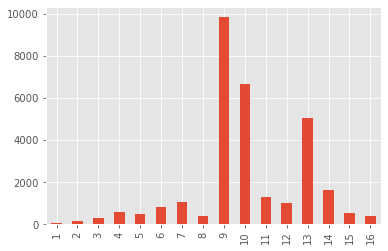

In [13]:
df.loc[:, 'education.num'].value_counts().sort_values().plot.bar();

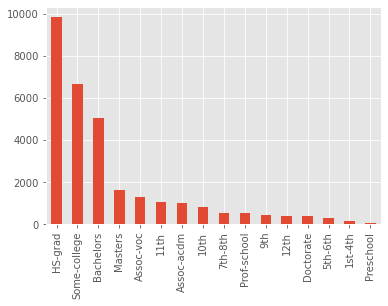

In [14]:
df.loc[:, 'education'].value_counts().plot.bar();

In [15]:
df_disc.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Private,289,HS-grad,10,Widowed,Exec-managerial,Not-in-family,White,Female,1,146,17,United-States,<=50K
1,33,Private,292,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,1,142,28,United-States,<=50K


In [16]:
df_disc.relationship.value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [17]:
df_h = df_disc.loc[df_disc.relationship == 'Husband']

In [18]:
df_h.sex.value_counts()

Male      12462
Female        1
Name: sex, dtype: int64

In [19]:
df_disc.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

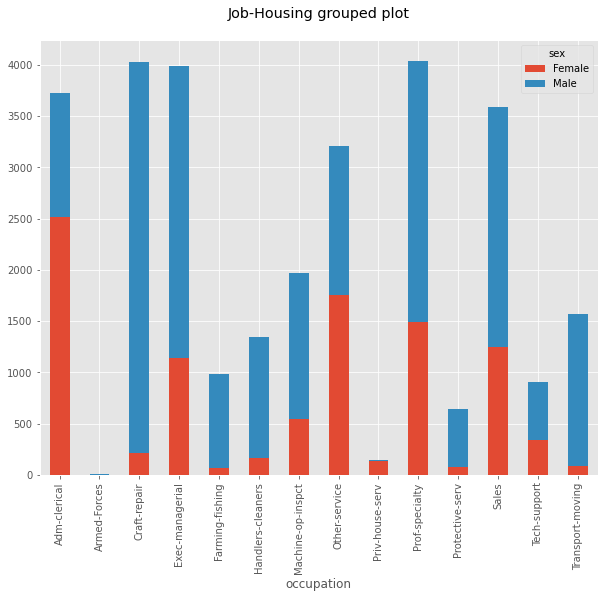

In [20]:
grouped_count = df_disc.groupby(['occupation', 'sex']).size()
grouped_count_unstack = grouped_count.unstack()
grouped_count_unstack.plot(kind='bar', stacked=True, figsize=(10, 8), title='Job-Housing grouped plot\n');

In [22]:
df.relationship.value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [23]:
df.sex.value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64